## 진행방향  
### 클러스터링 방법  
클러스터링 분류를 하기 위해서는 전체 데이터에서 몇 가지 특성만 골라내어서 하는것이 유리합니다. 그렇기에 Churn과 상관계수가 높은 몇 가지 특성들을 선택해 데이터를 새로 만들었고 (X,X2,X3) 데이터를 scaled하고 진행 하였습니다. (X_scaled,X2_scaled,X3_scaled)   

### 클러스터 수 찾기  
kmeans로 클러스터를 찾으려면 하이퍼 파라미터로 클러스터 수를 정해 주어야합니다.  
그렇다면 최적의 클러스터를 찾는 것이 중요한데 3 가지 방법을 수행했고 가장 유력해보이는 값들을 선정 했습니다.
X_scaled에서는  4, 5개로 진행하였고 (resultdata,resultdata2)  
X2_scaled 에서도 5개로 진행 (resultdata3)  
X3_scaled에서는 3개로 진행 하였습니다.(resultdata4)

### PCA로 차원 축소하여 클러스터 시각화  
X,X2,X3에서 한번씩 진행하였습니다.    
모두 명확하게 분류된 것 처럼 보이지 않습니다.  

### 결과 데이터 확인  
resultdata들을 확인하면 몇 클러스터에서는 분류가 잘 된 것으로 보이나  
한 개의 클라스터에서는 명확하게 보이지 않습니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [4]:
# Load the data
file_path = 'Churn_Preprocess.csv'  # 실제 파일 경로로 변경하세요
data = pd.read_csv(file_path,index_col=0)

# Define the columns to exclude for clustering
excluded_columns = ['Churn']


data를 분류하기위해서 가장 중요하다고 생각되는 특성 하나 또는 몇개를 가지고 분류를 해보겠습니다.

이 데이터는 이탈에 미치는 영향이 큰 특성이 몇 개 있습니다.

상관 계수 절대값이 큰 것들

Call per Month            -0.303418  
Frequency of Use          -0.303782  
Seconds of Use            -0.302406  
Seconds per Month         -0.300819  
Customer Value            -0.294510  
Status                     0.493410  
Complains                  0.538815  

이 중에서 내용이 비슷해 겹치는 것들은 제외하고 몇 가지 고르자면   
Complains,Status,Customer Value,Call per Month  
이렇게 네가지를 골라 클러스터링을 진행하겠습니다.


In [24]:
#칼럼 순서는 절대 값이 큰 순서
X = data[['Complains','Status','Call per Month','Customer Value']]

In [25]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Win

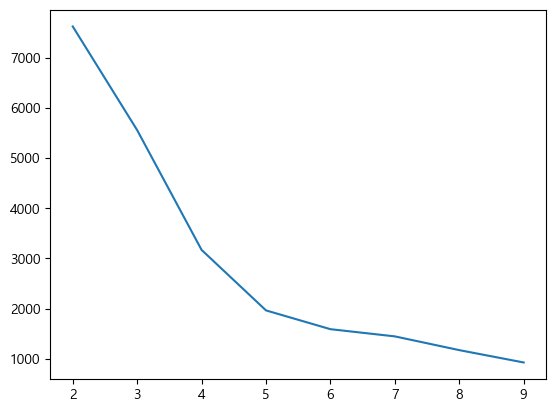

In [26]:
inertia = []
for k in range(2,10):
    km = KMeans(n_clusters=k,n_init='auto',random_state=4)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,10),inertia)
plt.show()


실루엣 점수는 -1에서 1 사이의 값을 가지며, 1에 가까울수록 데이터 포인트가 적절한 클러스터에 속해 있음을 나타냅니다.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 2, the average silhouette score is: 0.49


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 3, the average silhouette score is: 0.52


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 4, the average silhouette score is: 0.52


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 5, the average silhouette score is: 0.60


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 6, the average silhouette score is: 0.59


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 7, the average silhouette score is: 0.57


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 8, the average silhouette score is: 0.59


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 9, the average silhouette score is: 0.60


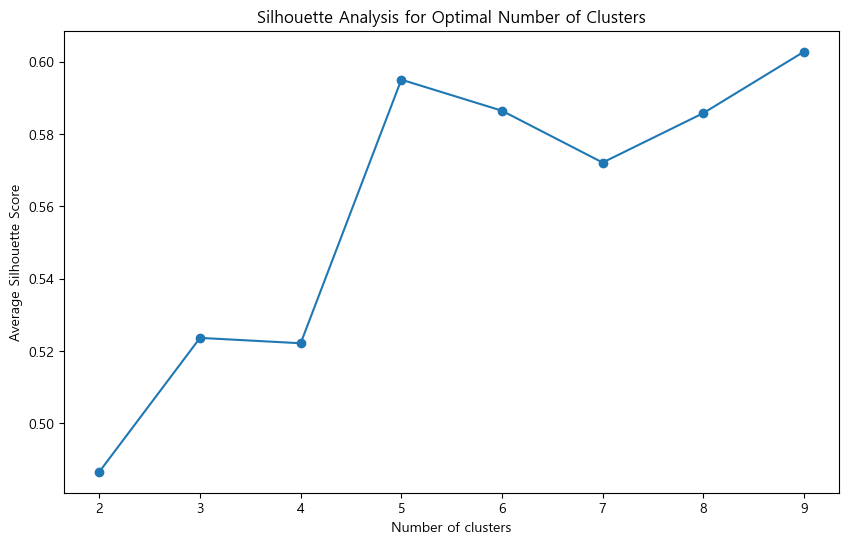

In [50]:
from sklearn.metrics import silhouette_score

silhouette_avgs = []

for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=4)
    cluster_labels = clusterer.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.2f}")

# 실루엣 점수를 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(2,10), silhouette_avgs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

데이터의 계층적 구조를 고려하여 클러스터링을 수행합니다.
덴드로그램을 사용하여 클러스터의 계층 구조를 시각화하고 최적의 클러스터 수를 결정할 수 있습니다.

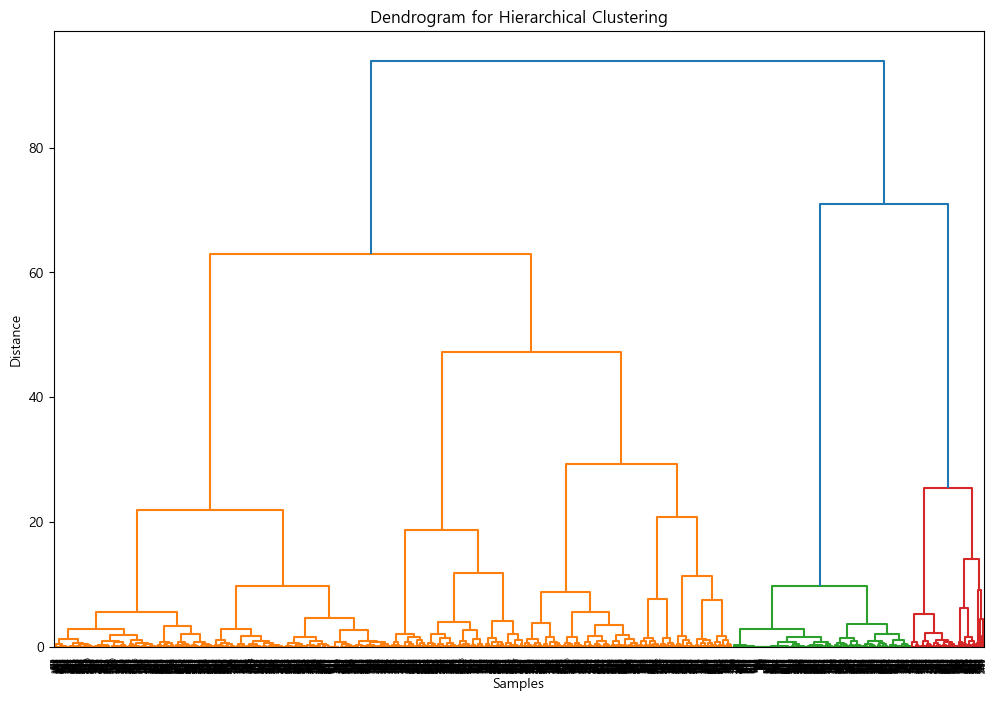

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram


# 계층적 클러스터링 수행
Z = linkage(X_scaled, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

엘보우 그래프는 5에서 가장 많이 꺾이고  
실루엣 점수는 5 , 9 에서 가장 높은 점수를 보였고  
덴드로그램 시각화에서는 3~4개 의 정도의 큰 분류를 보였습니다

엘보우 그래프와 실루엣 점수에서 유력한 후보로 보이는 5개로 진행해봅시다.

In [29]:
kmeans = KMeans(n_clusters=5, random_state=4)
clusters = kmeans.fit(X_scaled)
X["cluster"] = clusters.labels_
print(X["cluster"].unique())
X.head()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


[0 1 3 2 4]


C:\Users\USER\AppData\Local\Temp\ipykernel_21284\1036917982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters.labels_


,Complains,Status,Call per Month,Customer Value,cluster
0,0,1,7.89,197.640,0
1,0,2,0.56,46.035,1
2,0,1,6.67,1536.520,3
3,0,1,7.33,240.020,0
4,0,1,6.44,145.805,0


In [32]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = X["cluster"]

분류가 엉망입니다.

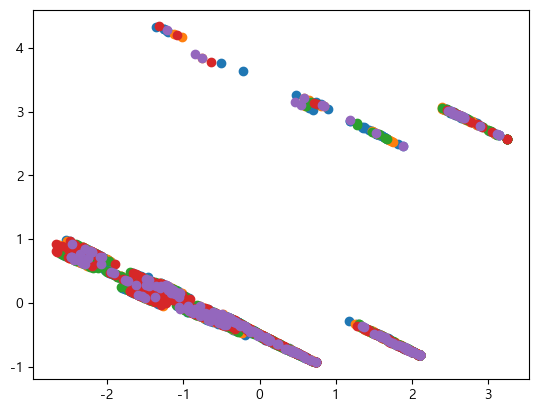

In [36]:
%matplotlib inline
for i in X["cluster"].unique():
    tmp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

In [39]:
resultdata = pd.concat([X,data['Churn']],axis=1)

In [40]:
resultdata

,Complains,Status,Call per Month,Customer Value,cluster,Churn
0,0,1,7.89,197.640,0,0
1,0,2,0.56,46.035,1,0
2,0,1,6.67,1536.520,3,0
3,0,1,7.33,240.020,0,0
4,0,1,6.44,145.805,0,0
...,...,...,...,...,...,...
3145,0,1,16.33,721.980,2,0
3146,0,1,19.67,261.210,2,0
3147,0,1,5.67,280.320,0,0
3148,0,1,5.11,1077.640,3,0


In [45]:
resultdata.groupby(['cluster','Churn']).count()['Status']

cluster  Churn
0        0        1061
         1          65
1        0         372
         1         210
2        0         482
3        0         609
4        0          36
         1         195
Name: Status, dtype: int64

클러스터 가 0,2,3인 부류는 이탈하지 않은 고객들이 주를 이루었고   
1 인 부류는 명확하게 나오지 않았습니다. 
이 결과로 보면 클러스터분류가 확실하진 않았던 것 같습니다.

덴드로그램 시각화로 본 4개로 진행해봅시다.   
엘보우 그래프에서도 4 에서 기울기 변화가 있었고  
실루엣 점수에서도 5보다는 낮은 편이지만 0.5 정도의 점수를 받았으니 진행해봅시다.

In [46]:
kmeans = KMeans(n_clusters=4, random_state=4)
clusters = kmeans.fit(X_scaled)
X["cluster"] = clusters.labels_
print(X["cluster"].unique())
X.head()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


[0 2 1 3]


C:\Users\USER\AppData\Local\Temp\ipykernel_21284\2520332151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters.labels_


,Complains,Status,Call per Month,Customer Value,cluster
0,0,1,7.89,197.640,0
1,0,2,0.56,46.035,2
2,0,1,6.67,1536.520,1
3,0,1,7.33,240.020,0
4,0,1,6.44,145.805,0


In [47]:
resultdata2= pd.concat([X,data['Churn']],axis=1)
resultdata2.groupby(['cluster','Churn']).count()['Status']

cluster  Churn
0        0        1169
         1          65
1        0         978
2        0         372
         1         210
3        0          41
         1         195
Name: Status, dtype: int64

이 번에도 클러스터 2 에서 분류가 되지 않았습니다.

특성이 부족했던 걸 까요? 한 가지 더 추가 해서 다시 진행해봅시다.

Call per Month 와 관련이 그나마 적은 Seconds per Month 를 추가해서 다시 진행합니다.

In [48]:
X2 = data[['Complains','Status','Call per Month','Customer Value','Seconds per Month']]
sc2 = StandardScaler()
X2_scaled = sc2.fit_transform(X2)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Win

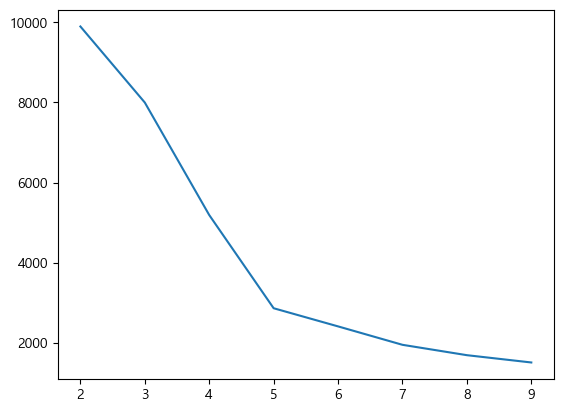

In [49]:
inertia = []
for k in range(2,10):
    km = KMeans(n_clusters=k,n_init='auto',random_state=4)
    km.fit(X2_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,10),inertia)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 2, the average silhouette score is: 0.33


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 3, the average silhouette score is: 0.44


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 4, the average silhouette score is: 0.51


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 5, the average silhouette score is: 0.55


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 6, the average silhouette score is: 0.52


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 7, the average silhouette score is: 0.53


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 8, the average silhouette score is: 0.53


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 9, the average silhouette score is: 0.54


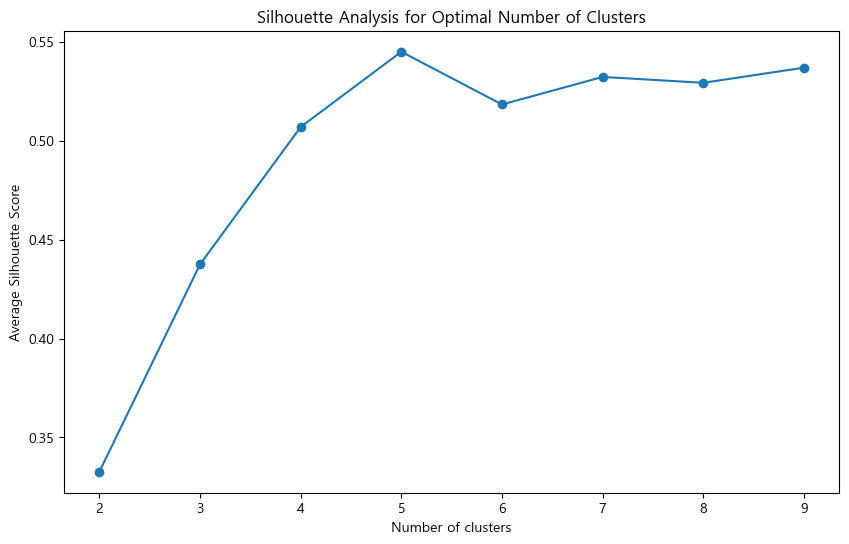

In [52]:
silhouette_avgs = []

for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=4)
    cluster_labels = clusterer.fit_predict(X2_scaled)
    silhouette_avg = silhouette_score(X2_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.2f}")

# 실루엣 점수를 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(2,10), silhouette_avgs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

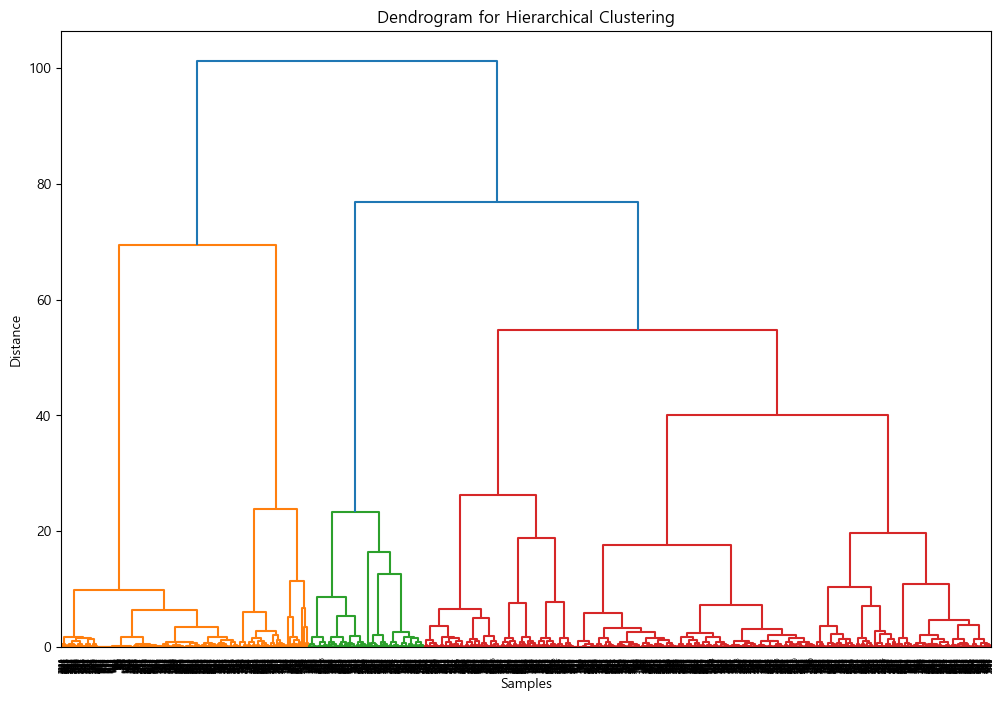

In [53]:
# 계층적 클러스터링 수행
Z = linkage(X2_scaled, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

엘보우와 실루엣점수는 5에서,   
덴드로그램은 크게 보면 3~ 6 의 값을 가지고 있습니다.

5에서 진행해보겠습니다.

In [54]:
kmeans = KMeans(n_clusters=5, random_state=4)
clusters = kmeans.fit(X2_scaled)
X2["cluster"] = clusters.labels_
print(X2["cluster"].unique())
X2.head()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


[3 2 1 0 4]


C:\Users\USER\AppData\Local\Temp\ipykernel_21284\203042980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2["cluster"] = clusters.labels_


,Complains,Status,Call per Month,Customer Value,Seconds per Month,cluster
0,0,1,7.89,197.640,485.56,3
1,0,2,0.56,46.035,35.33,2
2,0,1,6.67,1536.520,272.56,1
3,0,1,7.33,240.020,466.44,3
4,0,1,6.44,145.805,265.89,3


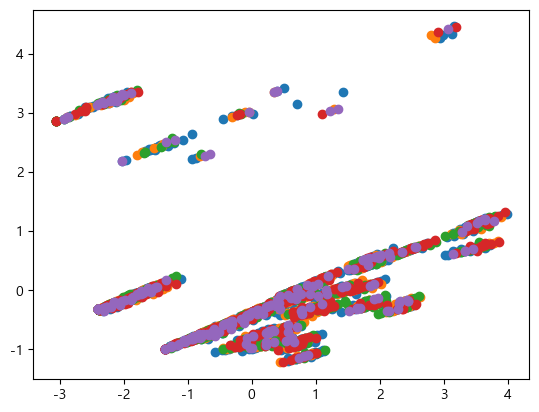

In [56]:
pca2 = PCA(n_components=2)
pca2.fit(X2_scaled)
x2_pca = pca2.transform(X2_scaled)
pca_df2 = pd.DataFrame(x2_pca)
pca_df2["cluster"] = X2["cluster"]

%matplotlib inline
for i in X2["cluster"].unique():
    tmp = pca_df2.loc[pca_df2["cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

pca로 차원압축하고 분류해도 엉망이네요 제가 뭘 잘못했을까요

In [55]:
resultdata3= pd.concat([X2,data['Churn']],axis=1)
resultdata3.groupby(['cluster','Churn']).count()['Status']

cluster  Churn
0        0         509
1        0         602
2        0         372
         1         210
3        0        1046
         1          65
4        0          31
         1         195
Name: Status, dtype: int64

마찬 가지로 클러스터 2에서는 분류가 명확하지 않은 것을 확인 할 수 있습니다.

이런 문제가 발생하는 것은 어떤 이유가 있을까요..  
아마도 명확한 특성 선택 실패(아마도 제 생각엔 컴플레인과 status가 의미가 없어보입니다.)인 것 같습니다.

두 카테고리형 값을 없애고 다시 진행해보겠습니다.

In [57]:
X3 = data[['Call per Month','Customer Value','Seconds per Month']]
sc3 = StandardScaler()
X3_scaled = sc3.fit_transform(X3)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Win

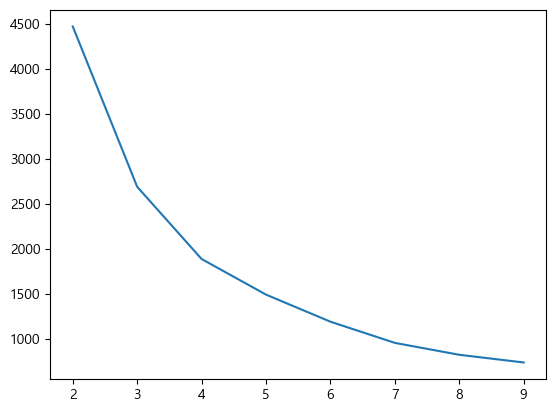

In [58]:
inertia = []
for k in range(2,10):
    km = KMeans(n_clusters=k,n_init='auto',random_state=4)
    km.fit(X3_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,10),inertia)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 2, the average silhouette score is: 0.52


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 3, the average silhouette score is: 0.54


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 4, the average silhouette score is: 0.50


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 5, the average silhouette score is: 0.49


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 6, the average silhouette score is: 0.48


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 7, the average silhouette score is: 0.50


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 8, the average silhouette score is: 0.52


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


For n_clusters = 9, the average silhouette score is: 0.48


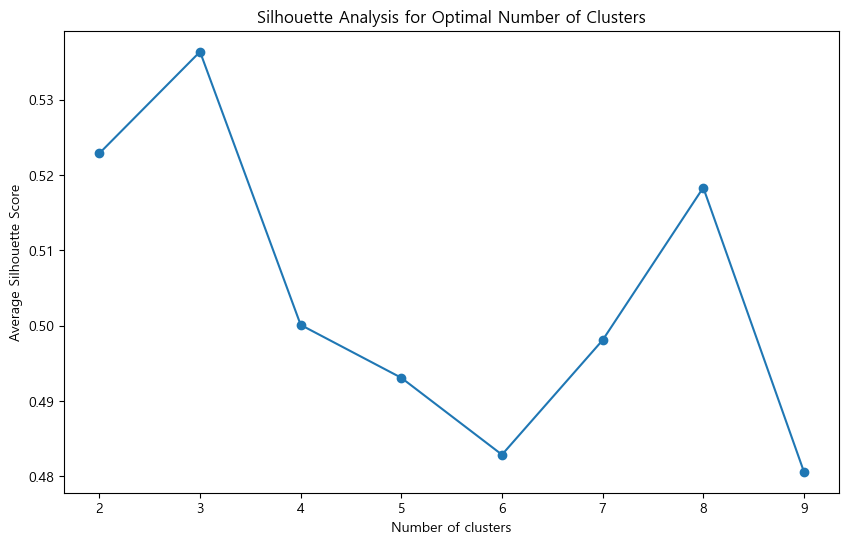

In [59]:
silhouette_avgs = []

for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=4)
    cluster_labels = clusterer.fit_predict(X3_scaled)
    silhouette_avg = silhouette_score(X3_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.2f}")

# 실루엣 점수를 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(2,10), silhouette_avgs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

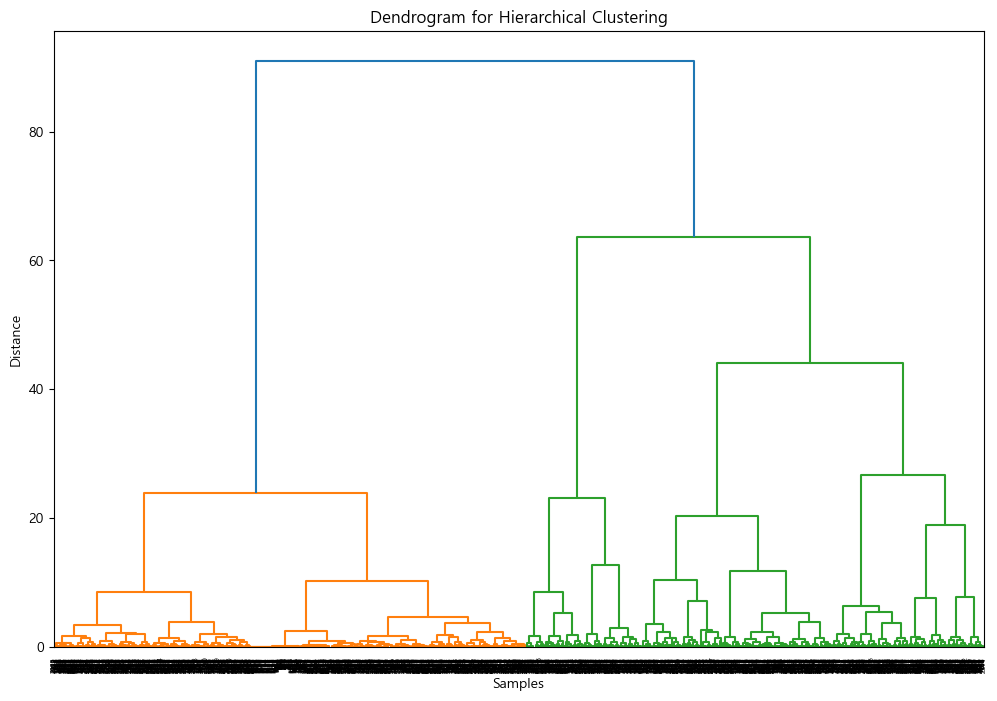

In [61]:
# 계층적 클러스터링 수행
Z = linkage(X3_scaled, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

3,3, 3~5 정도입니다 3 으로 진행해봅시다.

In [66]:
kmeans = KMeans(n_clusters=3, random_state=4)
clusters = kmeans.fit(X3_scaled)
X3["cluster"] = clusters.labels_
print(X3["cluster"].unique())
X3.head()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


[0 2 1]


C:\Users\USER\AppData\Local\Temp\ipykernel_21284\2211377468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3["cluster"] = clusters.labels_


,Call per Month,Customer Value,Seconds per Month,cluster
0,7.89,197.640,485.56,0
1,0.56,46.035,35.33,0
2,6.67,1536.520,272.56,2
3,7.33,240.020,466.44,0
4,6.44,145.805,265.89,0


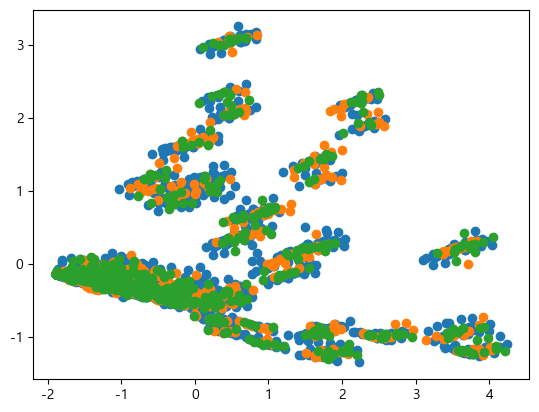

In [68]:
pca3 = PCA(n_components=2)
pca3.fit(X3_scaled)
x3_pca = pca3.transform(X3_scaled)
pca_df3 = pd.DataFrame(x3_pca)
pca_df3["cluster"] = X3["cluster"]

%matplotlib inline
for i in X3["cluster"].unique():
    tmp = pca_df3.loc[pca_df3["cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

In [65]:
resultdata4= pd.concat([X3,data['Churn']],axis=1)
resultdata4.groupby(['cluster','Churn']).count()['Call per Month']

cluster  Churn
0        0        1388
         1         465
1        0         570
2        0         602
         1           5
Name: Call per Month, dtype: int64

저번보단 명확해지긴했지만 클러스터 0 에서는 잘 모르겠습니다..